In [9]:
import numpy as np
import pandas
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score

%matplotlib inline

In [11]:
df = pandas.read_csv('C:/Users/Вова/Desktop/Новая папка/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df = df.dropna()

In [13]:
#TASK 1
tclass = df.groupby(['Pclass', 'Survived']).size().unstack()

In [14]:
print(tclass)

Survived   0    1
Pclass           
1         52  106
2          3   12
3          5    5


In [15]:
red, blue = '#B2182B', '#2166AC'

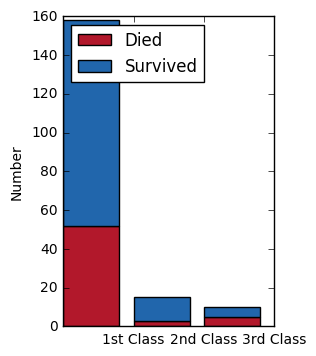

In [16]:
#Диаграмма, показывающая зависимость социально-экономических классов и выживших. Очевидно, что большинство выживших
#относятся к первому классу
plt.subplot(121)
plt.bar([0, 1, 2], tclass[0], color=red, label='Died')
plt.bar([0, 1, 2], tclass[1], bottom=tclass[0], color=blue, label='Survived')
plt.xticks([1.0, 2.0, 3.0], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Number")
plt.xlabel("")
plt.legend(loc='upper left')

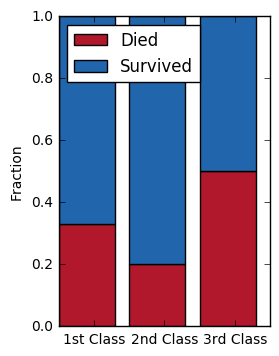

In [8]:
#Диаграмма показывает долю выживших и погибших в социально-экономическом классе. Так, видно, что наибольшая доля выживших
#во втором классе, однако из-за того, что кол-во людей из 2 класса меньше, картина с первой диаграммой расходится.
tclass = (1. * tclass.T / tclass.T.sum()).T
plt.subplot(122)
plt.bar([0, 1, 2], tclass[0], color=red, label='Died')
plt.bar([0, 1, 2], tclass[1], bottom=tclass[0], color=blue, label='Survived')
plt.xticks([0.5, 1.5, 2.5], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Fraction")
plt.legend(loc='upper left')
plt.xlabel("")
plt.show()

In [9]:
tsex = df.groupby(['Sex', 'Survived']).size().unstack()
print(tsex)

Survived   0   1
Sex             
female     6  82
male      54  41


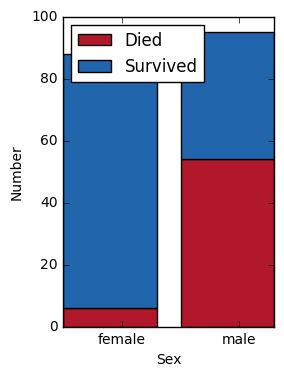

In [10]:
#Диаграмма показывает количество выживших  и погибших в зависимости от пола. Очевидно, что женщин выжило больше.
plt.subplot(122)
plt.bar([0, 1], tsex[0], color=red, label='Died')
plt.bar([0, 1], tsex[1], bottom=tsex[0], color=blue, label='Survived')
plt.xticks([0.5, 1.5], ['female', 'male'], rotation='horizontal')
plt.legend(loc='upper left')
plt.ylabel("Number")
plt.xlabel("Sex")

In [11]:
df[['Pclass', 'Fare']]

,Pclass,Fare
PassengerId,,
2,1,71.2833
4,1,53.1000
7,1,51.8625
11,3,16.7000
12,1,26.5500
22,2,13.0000
24,1,35.5000
28,1,263.0000
53,1,76.7292


In [12]:
first_class = df.query('Pclass == 1')['Fare']
second_class = df.query('Pclass == 2')['Fare']
third_class = df.query('Pclass == 3')['Fare']
data = [first_class, second_class, third_class]

In [13]:
print(data)

[PassengerId
2       71.2833
4       53.1000
7       51.8625
12      26.5500
24      35.5000
28     263.0000
53      76.7292
55      61.9792
63      83.4750
89     263.0000
93      61.1750
97      34.6542
98      63.3583
103     77.2875
111     52.0000
119    247.5208
125     77.2875
137     26.2833
138     53.1000
140     79.2000
152     66.6000
171     33.5000
175     30.6958
178     28.7125
195     27.7208
196    146.5208
210     31.0000
216    113.2750
219     76.2917
225     90.0000
         ...   
717    227.5250
725     53.1000
731    211.3375
738    512.3292
742     78.8500
743    262.3750
746     71.0000
749     53.1000
760     86.5000
764    120.0000
766     77.9583
780    211.3375
782     57.0000
783     30.0000
790     79.2000
797     25.9292
803    120.0000
807      0.0000
810     53.1000
821     93.5000
836     83.1583
854     39.4000
858     26.5500
863     25.9292
868     50.4958
872     52.5542
873      5.0000
880     83.1583
888     30.0000
890     30.0000
Name: Fare,

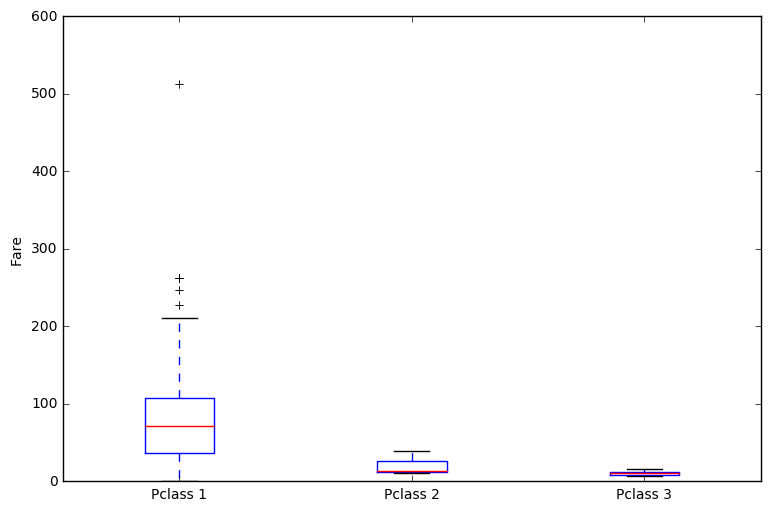

In [20]:
#Зависимость цены билета от класса. Видно, что цены в зависимости от класса достаточно сильно различаются. Самые дорогие - 
#первый класс (но у них же самый большой разброс по ценам)
f = plt.figure(1, figsize=(9, 6))
a = f.add_subplot(111)
b = a.boxplot(data, showfliers=True)
a.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'])
a.set_ylabel('Fare')
plt.show()

In [22]:
#TASK 2
import seaborn as sns

C:\Users\Вова\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


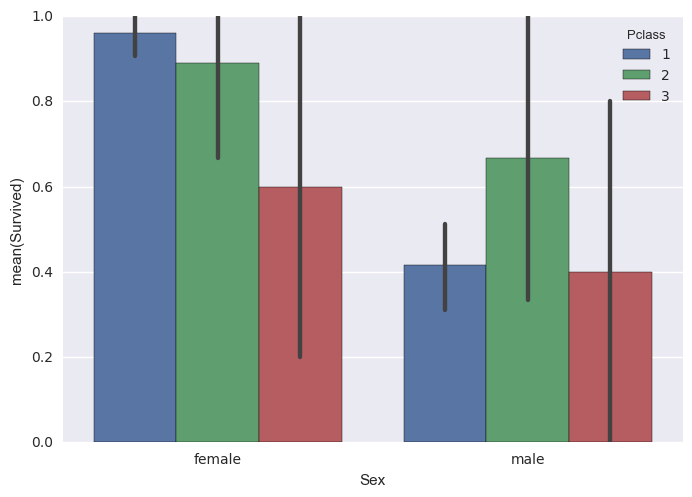

In [25]:
#Как и показала диаграмма о завсисимости пола и выживаемости, женщин выжило больше, чем мужчин. Больше всего выжило женщин
#первого класса. Что касается мужчин, то меньше всего выжило мужчин третьего класса, а мужчин второго класса выжило больше 
#всего.
#Допустим, что А - вероятность быть женщиной первого класса, B - вероятность быть женщиной второго класса, 
#C - вероятность быть женщиной третьего класса, D - вероятность быть мужчиной первого класса,
#E - вероятность быть мужчиной второго класса, F - вероятность выжить.
#P(F|A) > P(F|B) > P(F|C) > P(F|D) > P(F|D) P(F|E); P(F|E) > P(F|C) > P(F|D)
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

In [26]:
#TASK 3
x_labels = ['Pclass', 'Fare', 'Age', 'Sex']
X, y = df[x_labels], df['Survived']
X.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
2,1,71.2833,38.0,female
4,1,53.1000,35.0,female
7,1,51.8625,54.0,male
11,3,16.7000,4.0,female
12,1,26.5500,58.0,female


In [39]:
X['Sex'] = pandas.get_dummies(X['Sex'])

In [40]:
print(X['Sex'].unique())

[1 0]


In [17]:
df["Child"] = 0
df["Child"][df["Age"] < 18] = 1
print(df["Survived"][df["Child"] == 1].value_counts(normalize = True))

1    0.894737
0    0.105263
Name: Survived, dtype: float64


C:\Users\Вова\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
x_labels = ['Pclass', 'Fare', 'Age', 'Sex', 'Child', 'SibSp']
X, y = df[x_labels], df['Survived']
X.head()
#Были добавлены еще два столбца (Child, SibSp). В столбце Child: 1 - ребенок (моложе 18). SibSp - наличие братьев/сестер 

,Pclass,Fare,Age,Sex,Child,SibSp
PassengerId,,,,,,
2,1,71.2833,38.0,female,0,1
4,1,53.1000,35.0,female,0,1
7,1,51.8625,54.0,male,0,0
11,3,16.7000,4.0,female,1,1
12,1,26.5500,58.0,female,0,0


In [19]:
X['Sex'] = pandas.get_dummies(X['Sex'])

C:\Users\Вова\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
X.head()

,Pclass,Fare,Age,Sex,Child,SibSp
PassengerId,,,,,,
2,1,71.2833,38.0,1,0,1
4,1,53.1000,35.0,1,0,1
7,1,51.8625,54.0,0,0,0
11,3,16.7000,4.0,1,1,1
12,1,26.5500,58.0,1,0,0


In [21]:
#TASK 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test.describe()

(128, 6) (55, 6) (128,) (55,)


,Pclass,Fare,Age,Sex,Child,SibSp
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1.181818,67.520000,36.736364,0.527273,0.090909,0.400000
std,0.512471,54.642386,15.437105,0.503857,0.290129,0.494413
min,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1.000000,30.000000,25.500000,0.000000,0.000000,0.000000
50%,1.000000,55.000000,36.000000,1.000000,0.000000,0.000000
75%,1.000000,83.158300,47.000000,1.000000,0.000000,1.000000
max,3.000000,247.520800,80.000000,1.000000,1.000000,1.000000


In [57]:
clf = DecisionTreeClassifier(min_samples_split=5)
clf.fit(np.array(X_train), np.array(y_train))
importances = pandas.Series(clf.feature_importances_, index=x_labels)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.53      0.64      0.58        14
          1       0.87      0.80      0.84        41

avg / total       0.78      0.76      0.77        55



In [23]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score

In [71]:
parameteres = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
d = {}
for i in parameteres:
    data = []
    clf1 = DecisionTreeClassifier(min_samples_split=i)
    clf1.fit(np.array(X_train), np.array(y_train))
    y_pred1 = clf1.predict(X_test)
    data.append(f1_score(y_test, y_pred1))
    data.append(recall_score(y_test, y_pred1))
    data.append(precision_score(y_test, y_pred1))
    data.append(accuracy_score(y_test, y_pred1))
    d[i] = data
report = pandas.DataFrame(d, index=['f1_score', 'recall', 'precision', 'accuracy'], columns=d.keys())
print(report)

                 3         4         5         6         7         8   \
f1_score   0.805195  0.810127  0.810127  0.820513  0.810127  0.835443   
recall     0.756098  0.780488  0.780488  0.780488  0.780488  0.804878   
precision  0.861111  0.842105  0.842105  0.864865  0.842105  0.868421   
accuracy   0.727273  0.727273  0.727273  0.745455  0.727273  0.763636   

                 9         10        11        12        13        14  \
f1_score   0.831169  0.794872  0.835443  0.789474  0.794521  0.794521   
recall     0.780488  0.756098  0.804878  0.731707  0.707317  0.707317   
precision  0.888889  0.837838  0.868421  0.857143  0.906250  0.906250   
accuracy   0.763636  0.709091  0.763636  0.709091  0.727273  0.727273   

                 15  
f1_score   0.794521  
recall     0.707317  
precision  0.906250  
accuracy   0.727273  


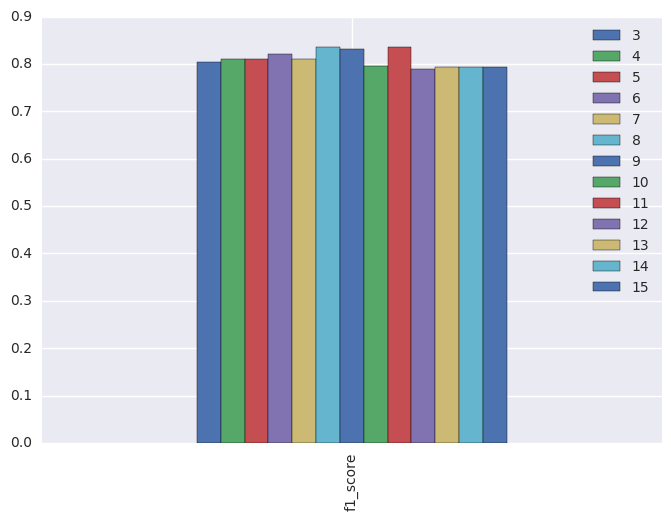

In [72]:
report[0:1].plot.bar()

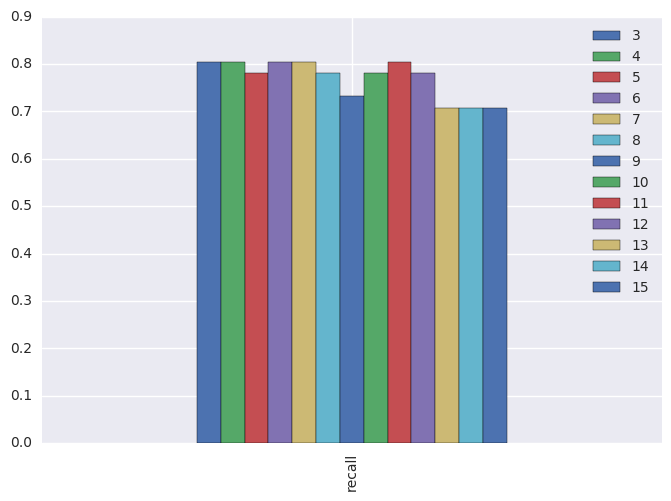

In [67]:
report[1:2].plot.bar()

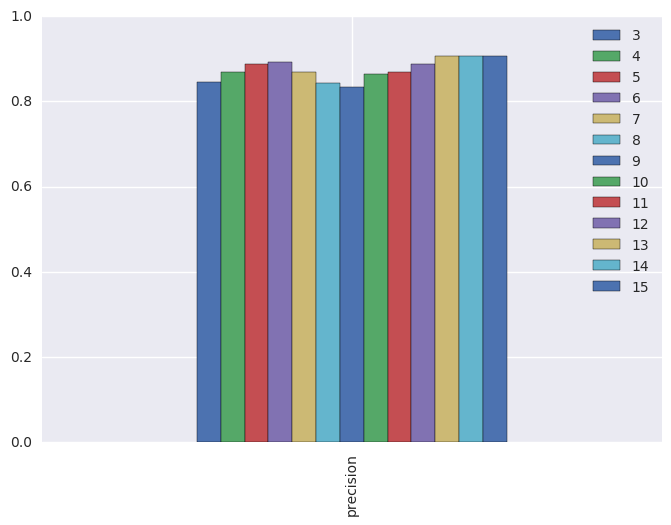

In [69]:
report[2:3].plot.bar()

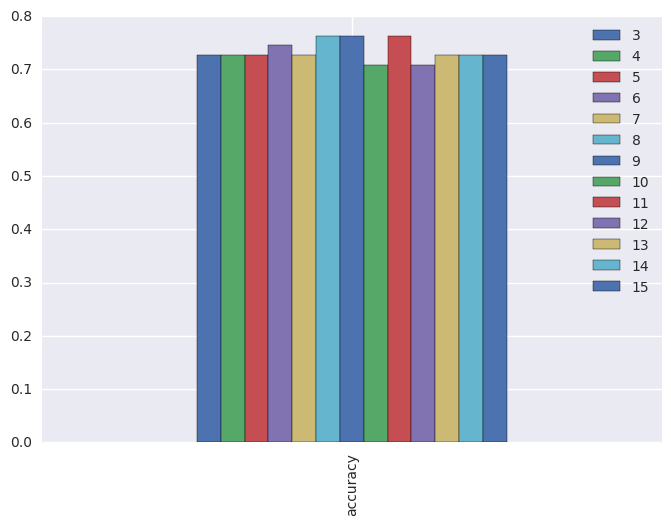

In [73]:
report[3:4].plot.bar()

In [74]:
#В качестве параметра модели я взяла min_samples_split (потому чт мы его использовали в классе :)).
#Я рассмотрела accuracy, точноть, полноту, F-меру. Эти метрики показали следующее:
#accuracy показало, что наибольшая доля документов по которым классификатор принял правильное решение при min_samples_split=11
#precision самый высокий при min_samples_split=6, recall - при min_samples_split=11, но и при min_samples_split=6
#F-мера представляет собой гармоническое среднее между точностью и полнотой. Так, наибольшее значение F-мера принимает при 
# min_samples_split=11. Следовательно, наилучшее значение параметра min_samples_split является 11.

In [75]:
clf_best = DecisionTreeClassifier(min_samples_split=11)

In [76]:
clf.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:
importances = pandas.Series(clf.feature_importances_, index=x_labels)
print(importances)

Pclass    0.000000
Fare      0.270397
Age       0.395875
Sex       0.333728
Child     0.000000
SibSp     0.000000
dtype: float64


In [78]:
y_predict = clf.predict(X_test)

In [79]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.53      0.71      0.61        14
          1       0.89      0.78      0.83        41

avg / total       0.80      0.76      0.77        55



In [25]:
#к сожалению, этот модкль не импортируется, хотя он установлен. Я почитала, многие сталкиваются с такой проблемой. 
#Но оставлю это здесь, может быть у тебя заработает...
import graphviz as gv

ImportError: No module named 'graphviz'

In [5]:
export_graphviz(clf_best, out_file="mytree.dot", feature_names=x_labels)
with open("mytree.dot") as f:
    graph = f.read()
graphviz.Source(graph)

NameError: name 'export_graphviz' is not defined

In [24]:
#TASK 5
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.56      0.67      0.61        15
          1       0.86      0.80      0.83        40

avg / total       0.78      0.76      0.77        55



In [36]:
data = []
for i in range(1,100):
    model1 = RandomForestClassifier(n_estimators=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    data.append(f1_score(y_test, y_pred))
print(data)

[0.8648648648648648, 0.80555555555555547, 0.77922077922077915, 0.8571428571428571, 0.84615384615384615, 0.77777777777777768, 0.81578947368421062, 0.82191780821917804, 0.8571428571428571, 0.85333333333333328, 0.83116883116883122, 0.8421052631578948, 0.8421052631578948, 0.8571428571428571, 0.83116883116883122, 0.86075949367088611, 0.83116883116883122, 0.8571428571428571, 0.80519480519480513, 0.8648648648648648, 0.87179487179487181, 0.78947368421052622, 0.83116883116883122, 0.82666666666666666, 0.8421052631578948, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.83116883116883122, 0.83116883116883122, 0.83116883116883122, 0.83116883116883122, 0.81578947368421062, 0.83116883116883122, 0.81578947368421062, 0.84615384615384615, 0.8421052631578948, 0.82666666666666666, 0.83116883116883122, 0.83116883116883122, 0.84615384615384615, 0.80519480519480513, 0.82051282051282048, 0.82051282051282048, 0.8648648648648648, 0.84615384615384615, 0.81578947368421062, 0.84615384615384615, 0.815

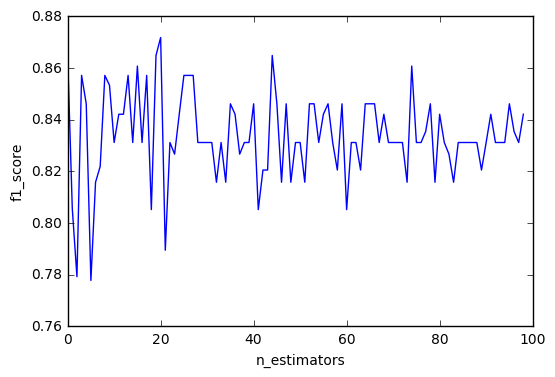

In [38]:
plt.plot(data)
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.show()

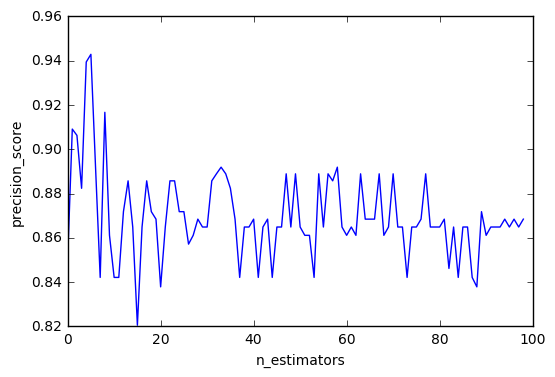

In [39]:
data = []
for i in range(1,100):
    model1 = RandomForestClassifier(n_estimators=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    data.append(precision_score(y_test, y_pred))
plt.plot(data)
plt.xlabel('n_estimators')
plt.ylabel('precision_score')
plt.show()

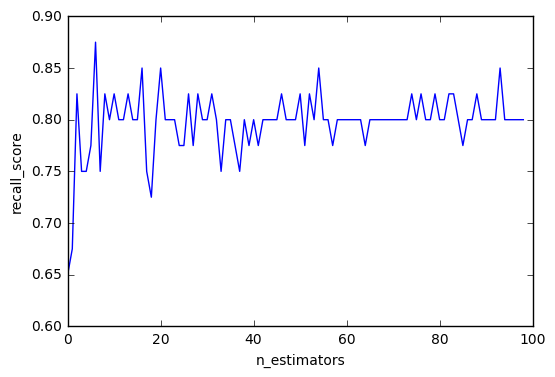

In [40]:
data = []
for i in range(1,100):
    model1 = RandomForestClassifier(n_estimators=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    data.append(recall_score(y_test, y_pred))
plt.plot(data)
plt.xlabel('n_estimators')
plt.ylabel('recall_score')
plt.show()

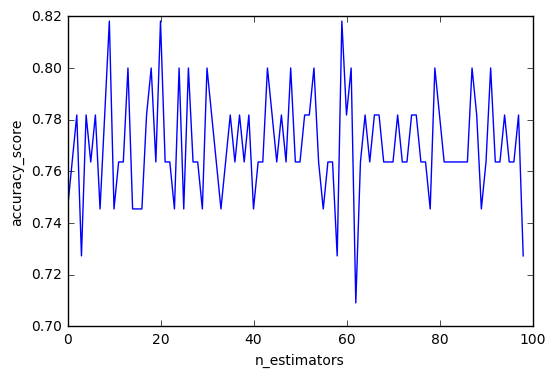

In [41]:
data = []
for i in range(1,100):
    model1 = RandomForestClassifier(n_estimators=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    data.append(accuracy_score(y_test, y_pred))
plt.plot(data)
plt.xlabel('n_estimators')
plt.ylabel('accuracy_score')
plt.show()

In [ ]:
#Я считаю, что в анализе классификатора нужно в большей степени ориентироваться на F-меру. По первому графику мы видими, что 
#пик приходится на n_estimators = 20 (приблизительно), однако там слишком большой разброс, поэтому этому значенеию не очень
#хочется доверять. Кажется, что идельным n_estimators будет равен примерно от 60-80.